In [1]:
# Kolminkertainen eksponentiaalinen tasoitus
# Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi. Eksponentiaalisen tasoituksen 
#mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän 
#ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
# Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Month,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [3]:
df.index = pd.to_datetime(df['Month'],format="%Y-%m")
df=df.drop('Month',axis=1)
df

,Saapuneet
Month,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


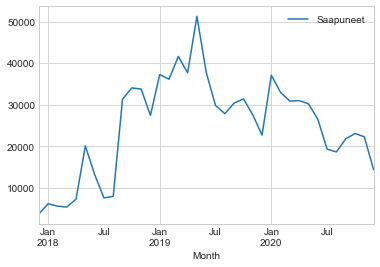

In [4]:
df.plot()

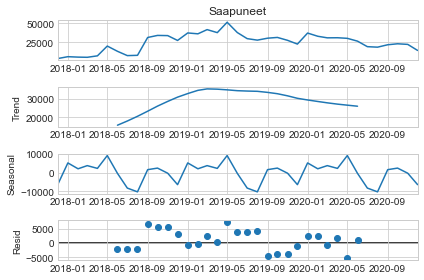

In [5]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu

decompose = seasonal_decompose(df['Saapuneet']).plot()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#Kausivaihteluun (seasonal) käytän summamallia (add) tai tulomallia (mul). Tulomallissa kausivaihtelu ilmenee kertoimina. Tässä olen kokeillut myös summamallia, mutta tulomalli osoittautui paremmaksi.
#seasonal_periods-parametrille käytän arvoa 5, koska kausivaihtelu esiintyy viiden kuukauden jaksoissa.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden ensimmäiset päivät. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 5, freq='MS').fit()

In [7]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Saapuneet,Ennuste
Month,,
2017-12-01,3714,4168.389711
2018-01-01,6185,3731.444274
2018-02-01,5615,6380.683818
2018-03-01,5381,5718.049876
2018-04-01,7284,5522.646004
2018-05-01,20116,8191.073730
2018-06-01,13238,16598.590842
2018-07-01,7594,14997.977836
2018-08-01,7968,8738.734783


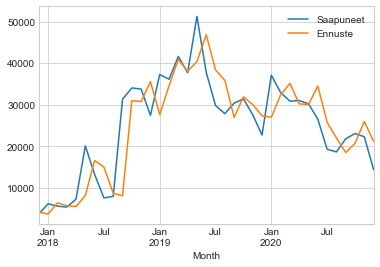

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,4168.389711,-454.389711
2018-01-01,6185,3731.444274,2453.555726
2018-02-01,5615,6380.683818,-765.683818
2018-03-01,5381,5718.049876,-337.049876
2018-04-01,7284,5522.646004,1761.353996
2018-05-01,20116,8191.073730,11924.926270
2018-06-01,13238,16598.590842,-3360.590842
2018-07-01,7594,14997.977836,-7403.977836
2018-08-01,7968,8738.734783,-770.734783


Text(0, 0.5, 'Ennustevirhe')

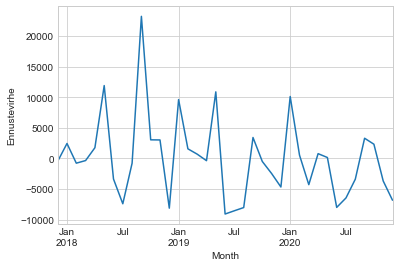

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

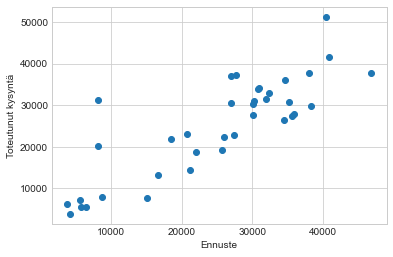

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Saapuneet'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,endog,No. Observations:,37
Model:,ExponentialSmoothing,SSE,1633763110.745
Optimized:,True,AIC,669.320
Trend:,Additive,BIC,683.818
Seasonal:,Multiplicative,AICC,679.880
Seasonal Periods:,5,Date:,"Fri, 29 Jan 2021"
Box-Cox:,False,Time:,10:39:47
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8168985,alpha,True
smoothing_slope,2.9366e-11,beta,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Ennuste,Ennustevirhe
Month,,,
2020-08-01,18656,22042.960306,-3386.960306
2020-09-01,21814,18503.398111,3310.601889
2020-10-01,23083,20747.335595,2335.664405
2020-11-01,22302,25976.000277,-3674.000277
2020-12-01,14365,21188.406612,-6823.406612


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-01-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-01-01,16867.433939
2021-02-01,16225.721816
2021-03-01,15936.017472
2021-04-01,18361.383913
2021-05-01,16988.970781
2021-06-01,18326.648353


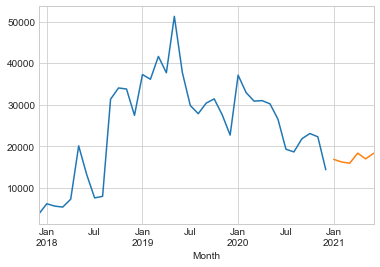

In [15]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [16]:
# Dataframe, jossa alkuperäinen aikasarja ja lasketut ennusteet
df1 = pd.concat([df, df_ennuste])
df1

,Saapuneet,Ennuste,Ennustevirhe
2017-12-01,3714.0,4168.389711,-454.389711
2018-01-01,6185.0,3731.444274,2453.555726
2018-02-01,5615.0,6380.683818,-765.683818
2018-03-01,5381.0,5718.049876,-337.049876
2018-04-01,7284.0,5522.646004,1761.353996
2018-05-01,20116.0,8191.073730,11924.926270
2018-06-01,13238.0,16598.590842,-3360.590842
2018-07-01,7594.0,14997.977836,-7403.977836
2018-08-01,7968.0,8738.734783,-770.734783
2018-09-01,31344.0,8097.651234,23246.348766
